# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [93]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
# separacion de datos de entranmiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
#creacion del modelo
modelo = LinearRegression()

In [7]:
#entranamiento del modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [8]:
#predicion de train
y_train_pred = modelo.predict(X_train)
#predicion de test
y_test_pred = modelo.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
#r2 score de entrenamiento
r2_score(y_train, y_train_pred)

0.7441398189164299

In [11]:
#r2 score de test
r2_score(y_test, y_test_pred)

0.6953590100159743

## 4. Calculate and print mean squared error for both the training and the testing set.

In [13]:
#mean squared error de entrenamiento
mean_squared_error(y_train, y_train_pred)

23.219133226630085

In [14]:
#mean squared error de entrenamiento
mean_squared_error(y_test, y_test_pred)

17.879540162814635

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [16]:
#mean absolute error de entrenamiento
mean_absolute_error(y_train, y_train_pred)

3.443888457700035

In [17]:
#mean absolute error de test
mean_absolute_error(y_test, y_test_pred)

3.1377343929855264

## Classification Model Evaluation

In [18]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [58]:
# separacion de datos de entranmiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [59]:
#creacion del modelo, se aplico max_iter para solucionar un error que indicaba el modelo al ejecutar
modelo = LogisticRegression(max_iter=1000)

In [60]:
#entranamiento del modelo, se aplico .values.ravel() al y_train , para quitar un error que indicaba el modelo
modelo.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [61]:
#predicion de train
y_train_pred = modelo.predict(X_train)
#predicion de test
y_test_pred = modelo.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [66]:
#accuracy score  de entrenamiento
accuracy_score(y_train, y_train_pred)

0.9916666666666667

In [67]:
#accuracy score de test
accuracy_score(y_test, y_test_pred)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [69]:
#accuracy score  de entrenamiento
balanced_accuracy_score(y_train, y_train_pred)

0.990990990990991

In [70]:
#accuracy score de test
balanced_accuracy_score(y_test, y_test_pred)

0.9487179487179488

## 10. Calculate and print the precision score for both the training and the testing set.

In [73]:
#accuracy score  de entrenamiento, aplicando average="micro" porque el valor por defecto (average="binary") da error
precision_score(y_train, y_train_pred, average="micro")

0.9916666666666667

In [74]:
#accuracy score de test,  aplicando average="micro" porque el valor por defecto (average="binary") da error
precision_score(y_test, y_test_pred, average="micro")

0.9333333333333333

## 11. Calculate and print the recall score for both the training and the testing set.

In [79]:
#accuracy score  de entrenamiento, aplicando average="macro" porque el valor por defecto (average="binary") da error
recall_score(y_train, y_train_pred, average="macro")

0.990990990990991

In [80]:
#accuracy score  de entrenamiento, aplicando average="macro" porque el valor por defecto (average="binary") da error
recall_score(y_test, y_test_pred, average="macro")

0.9487179487179488

## 12. Calculate and print the F1 score for both the training and the testing set.

In [87]:
#accuracy score  de entrenamiento, aplicando average="weighted" porque el valor por defecto (average="binary") da error
f1_score(y_train, y_train_pred, average="weighted")

0.9916597898443087

In [86]:
#accuracy score  de entrenamiento, aplicando average="weighted" porque el valor por defecto (average="binary") da error
f1_score(y_test, y_test_pred, average="weighted")

0.9338888888888889

## 13. Generate confusion matrices for both the training and the testing set.

In [90]:
# confusion matrix de entrenamiento
confusion_matrix(y_train, y_train_pred)

array([[42,  0,  0],
       [ 0, 36,  1],
       [ 0,  0, 41]], dtype=int64)

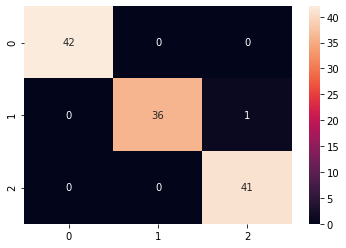

In [94]:
#visualizacion como un mapa de calor de la confusion matrix de entrenamiento
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True)

In [91]:
# confusion matrix de entrenamiento
confusion_matrix(y_test, y_test_pred)

array([[ 8,  0,  0],
       [ 0, 11,  2],
       [ 0,  0,  9]], dtype=int64)

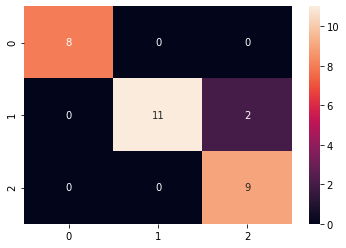

In [95]:
#visualizacion como un mapa de calor de la confusion matrix de test
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.